# Annotate Changi Data

In [26]:
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from scripts.io import read_image, KEY_INPUT_EO, KEY_INPUT_SAR
from scripts.utils import T
from skimage import exposure

In [27]:
def draw_label(img, text, org, font, fontscale=0.5, text_color=(255, 0, 0),
               bg_color=(255, 255, 255), thickness=1, padding=1):
    """
    Draw a filled white rectangle behind the text, then the text on top.
    org: bottom-left corner (x, y) used by cv2.putText.
    """
    (tw, th), baseline = cv2.getTextSize(text, font, fontscale, max(1, thickness))
    x, y = org

    tl = (x - padding, y - th - padding)                   # top-left
    br = (x + tw + padding, y + baseline + padding)        # bottom-right

    h, w = img.shape[:2]
    tl = (max(0, tl[0]), max(0, tl[1]))
    br = (min(w - 1, br[0]), min(h - 1, br[1]))

    cv2.rectangle(img, tl, br, bg_color, -1)
    cv2.putText(img, text, org, font, fontscale, text_color, max(1, thickness), cv2.LINE_AA)


def add_annotation(img):
    font = cv2.FONT_HERSHEY_DUPLEX
    fontscale = 0.5
    lw = 1

    img_annotated = img.copy()

    # Plane
    draw_label(img_annotated, "Plane", (158, 170), font, fontscale, (255, 0, 0), (255, 255, 255), lw)
    cv2.circle(img_annotated, (168, 185), 10, (255, 0, 0), lw)

    # Urban (rotated rectangle)
    draw_label(img_annotated, "Urban", (10, 20), font, fontscale, (255, 0, 0), (255, 255, 255), lw)
    rect = ((0, 75), (100, 75), 55)
    box = cv2.boxPoints(rect)
    box = np.int32(box)
    cv2.polylines(img_annotated, [box], True, (255, 0, 0), lw)

    # Plane park (rotated rectangle)
    draw_label(img_annotated, "Plane park", (80, 107), font, fontscale, (255, 0, 0), (255, 255, 255), lw)
    rect = ((105, 132), (50, 35), 10)
    box = cv2.boxPoints(rect)
    box = np.int32(box)
    cv2.polylines(img_annotated, [box], True, (255, 0, 0), lw)

    return img_annotated

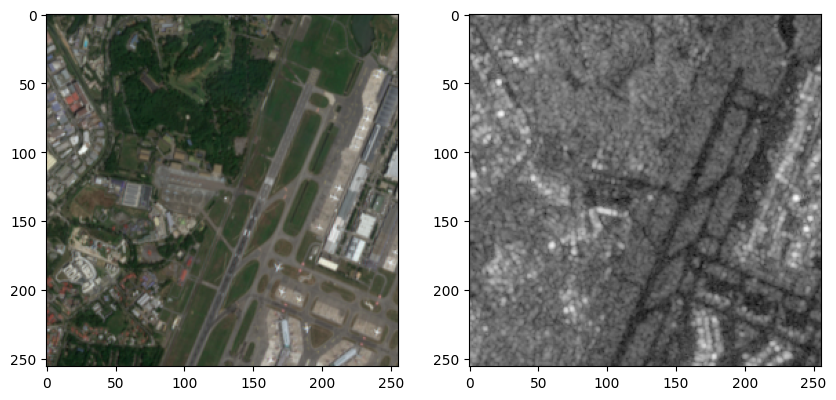

In [28]:
input_path = "../../dataset/data_changi.npz"

sar = read_image(input_path, key=KEY_INPUT_SAR).squeeze()
eo = read_image(input_path, key=KEY_INPUT_EO)
eo = exposure.adjust_gamma(eo, gamma=0.6, gain=1.0)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(eo)
plt.subplot(1, 2, 2)
plt.imshow(sar, cmap='gray')

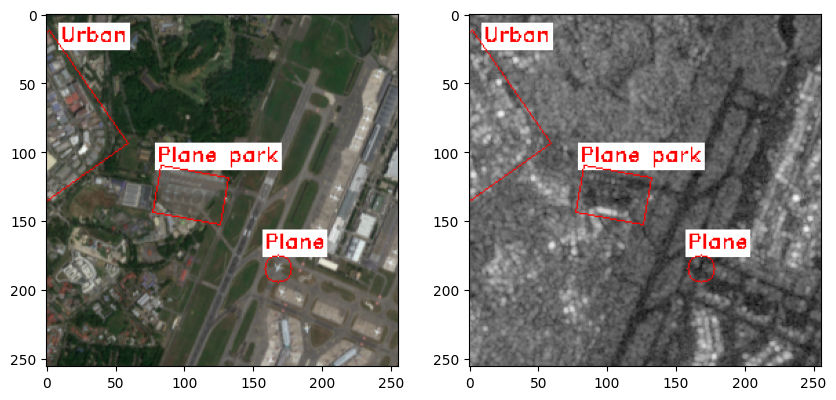

In [ ]:
eo_annotated = add_annotation(eo * 255.).clip(0, 255).astype(np.uint8)
sar_annotated = add_annotation(np.dstack([sar * 255.] * 3)).clip(0, 255).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(eo_annotated)
plt.subplot(1, 2, 2)
plt.imshow(sar_annotated)

# plt.imsave(Path.home() / 'Downloads' / 'eo_changi_annotated.png', eo_annotated, dpi=300) 
# plt.imsave(Path.home() / 'Downloads' / 'sar_changi_annotated.png', sar_annotated, dpi=300) 